In [1]:
# Import dependencies for logistic regression model
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns

%matplotlib inline

### Loading and Preprocessing Data

In [2]:
#  Import and read the loan_approval_dataset.csv.
loan_df = pd.read_csv('Resources/loan_approval_dataset.csv')
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Check for leading/trailing whitespaces in the column names
loan_df.columns = loan_df.columns.str.strip()

In [4]:
# Drop loan id as it is not beneficial 
loan_df = loan_df.drop('loan_id', axis=1)

### Separate the features `X` from the target `y`

In [5]:
# Separate the features, X,  from the target variable, y
y = loan_df['loan_status']
X = loan_df.drop(columns='loan_status')

In [6]:
# Preview the features data
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


### Encode the categorical variables from the features data using `get_dummies`

In [7]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [8]:
# Review the features data
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1


### Create training and testing datasets

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale the data using `StandardScaler`

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create model and train it using the training data

In [11]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Save model

In [12]:
# Save the model to a file
file_path = 'Model/logistic_regression_model.pkl'
joblib.dump(model, file_path)

['Model/logistic_regression_model.pkl']

### Score the model using the test data

In [13]:
# Print training and testing data scores
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9233601070950469
Testing Data Score: 0.9039812646370023


### Make predictions

In [14]:
# Make predictions using the model
predictions = model.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,Rejected,Rejected
1,Approved,Approved
2,Rejected,Rejected
3,Approved,Approved
4,Approved,Approved
5,Approved,Approved
6,Approved,Approved
7,Rejected,Rejected
8,Approved,Approved
9,Rejected,Rejected


### Calculate the accuracy score

In [15]:
# Display the accuracy score for the test dataset
accuracy_score(y_test, predictions)

0.9039812646370023

### Calculate the classification report

In [16]:
# Calculate and display the classification report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Approved       0.93      0.92      0.92       810
    Rejected       0.87      0.87      0.87       471

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281



### Generate the confusion matrix

In [17]:
# Print confusion matrix
conf_matrix= confusion_matrix(y_pred,y_test)
conf_matrix

array([[747,  60],
       [ 63, 411]], dtype=int64)

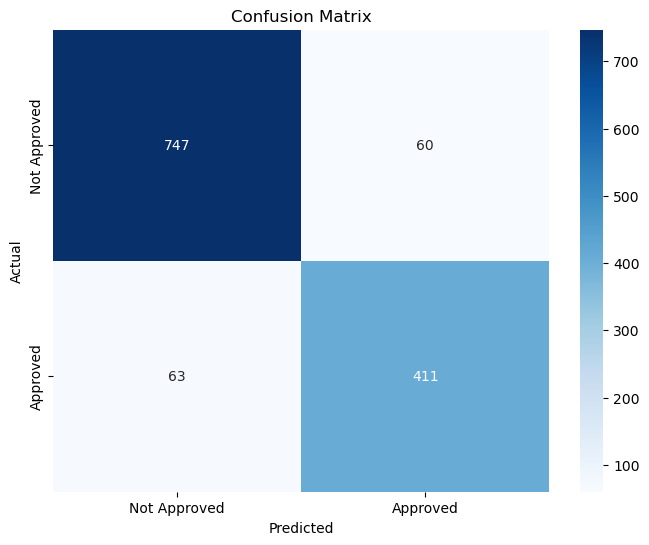

In [18]:
# Create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save an image of the chart and print it to the screen
plt.savefig("Visualizations/lg_confusion_matrix.png", bbox_inches="tight")
plt.show()

### Determine feature importance

In [19]:
# Access the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients to see the most important features
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
sorted_feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the sorted feature importance
print(sorted_feature_importance)

                     Feature  Coefficient  Abs_Coefficient
4                cibil_score    -4.264999         4.264999
1               income_annum     1.602127         1.602127
2                loan_amount    -1.200096         1.200096
3                  loan_term     0.858862         0.858862
7        luxury_assets_value    -0.358160         0.358160
8           bank_asset_value    -0.112642         0.112642
6    commercial_assets_value    -0.051367         0.051367
11         self_employed_ No     0.040234         0.040234
12        self_employed_ Yes    -0.040234         0.040234
0           no_of_dependents     0.024804         0.024804
5   residential_assets_value    -0.003020         0.003020
9        education_ Graduate    -0.001461         0.001461
10   education_ Not Graduate     0.001461         0.001461


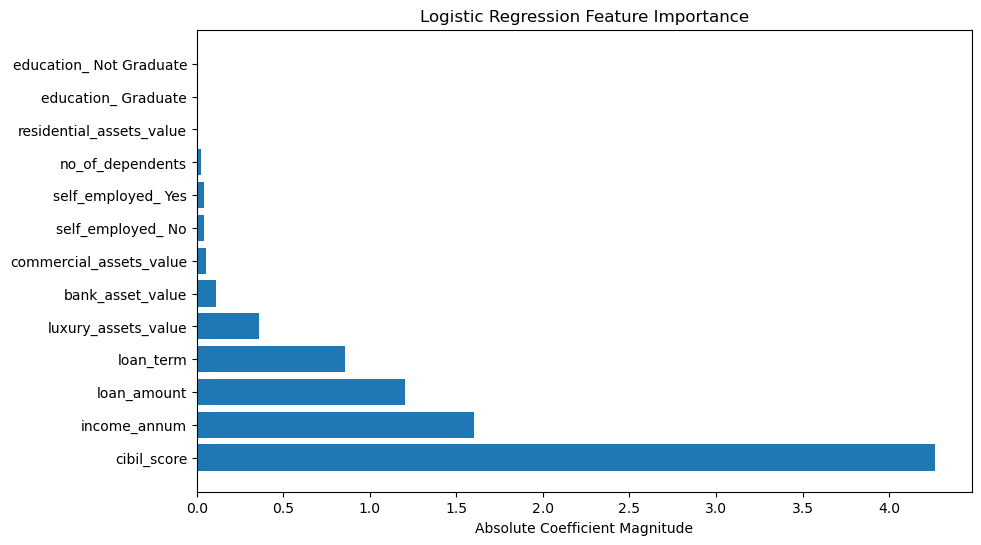

In [20]:
# Plot the feature importance (sorted by absolute coefficient magnitude)
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance['Feature'], sorted_feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance')

# Save an image of the chart and print it to the screen
plt.savefig("Visualizations/lr_feature_importance.png", bbox_inches="tight")
plt.show()